-71042.44430442253


/tmp/ipykernel_283689/2991861089.py:49: RuntimeWarning: overflow encountered in exp
  return np.sum(target * scores - np.log(1 + np.exp(scores)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


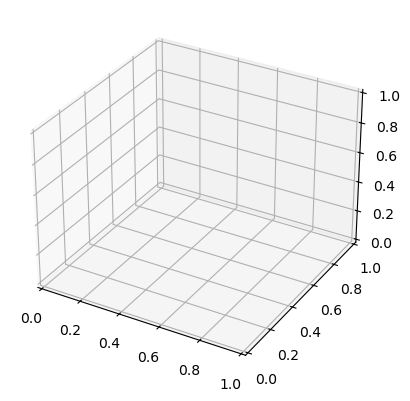

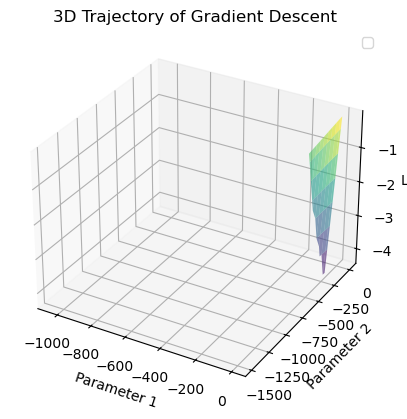

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np




class LogisticRegression:
    def __init__(self) -> None:
        self.intercept = 0
        self.coefs = []
        self.loss = []
        self.weights = []
        self.gradients = []

    def fit(self, iterations, alpha, X, y, intercept=False, log_gradient=False):
        if intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])

        b = np.zeros(X.shape[1])
        for index in range(iterations):
            grad = self._compute_gradients(X, b, y)
            b += alpha * grad

            if log_gradient:
                self.gradients.append(grad)

            log_likelihood = self.log_likelihood(X, y, b)
            self.loss.append(log_likelihood)

            if index % 10000 == 0:
                print(log_likelihood)

        self.intercept = b[0]  # The first element of b is the intercept
        self.coefs = b[1:]

    def _compute_gradients(self, X, b, y):
        probabilities = self.logistic_function(X, b)
        gradient = np.dot(X.T, (y - probabilities))
        return gradient

    def logistic_function(self, X, b):
        return 1 / (1 + np.exp(-np.dot(X, b)))

    def log_likelihood(self, features, target, weights):
        scores = np.dot(features, weights)
        return np.sum(target * scores - np.log(1 + np.exp(scores)))

    def predict(self, X):
        self.weights = np.append(self.intercept, np.array(self.coefs).flatten())
        return np.round(self.logistic_function(X, self.weights))


np.random.seed(1)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, 0.75], [0.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, 0.75], [0.75, 1]], num_observations)
features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
data_with_intercept = np.hstack((np.ones((features.shape[0], 1)),
                                features))
max_iter = 30
learning_rate = 0.003

log_reg = LogisticRegression()
log_reg.fit(
    max_iter, learning_rate, features, labels, True, True
)
own_predict = log_reg.predict(data_with_intercept)




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# remove intercept term
gradients = [grad[1:] for grad in log_reg.gradients]
loss = np.array(log_reg.loss[3:])
loss = np.abs(loss)

param1_values = [grad[0] for grad in gradients][3:]
param2_values = [grad[1] for grad in gradients][3:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
param1_range = np.linspace(min(param1_values), max(param1_values), 100)
param2_range = np.linspace(min(param2_values), max(param2_values), 100)
W1, W2 = np.meshgrid(param1_range, param2_range)

Z = np.array([[log_reg.log_likelihood(features, labels, [w1, w2]) for w1, w2 in zip(w1_row, w2_row)] 
              for w1_row, w2_row in zip(W1, W2)])
ax.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.6)

# Labeling the axes
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Loss')
ax.set_title('3D Trajectory of Gradient Descent')

# Show the plot
plt.legend()


In [7]:
plt.show()
